<a href="https://colab.research.google.com/github/Khushibung05/hierarchical_clustering/blob/main/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix




from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

# Path to the dataset (update if needed)
path = '/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv'

# Importing the dataset
df= pd.read_csv(path)
print(df.head())

Mounted at /content/drive
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [2]:

df.isna().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [3]:
x = df.iloc[:,[3,4]].values

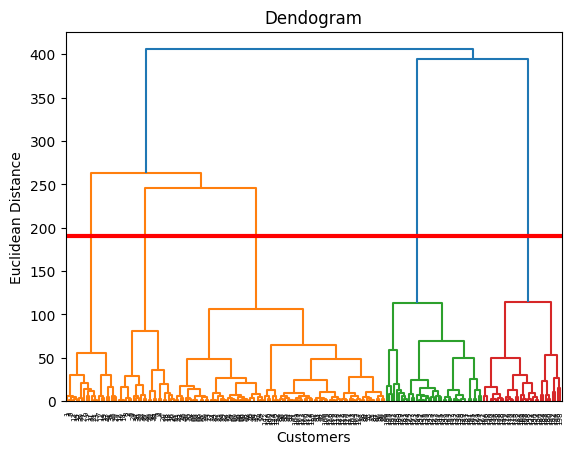

In [8]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.axhline(y=190, color='r', linewidth=3)#horizontal
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

That Y line (horizontal line) is used to show the cut-off distance in a dendrogram.

✅ Meaning:

The Y-axis = Euclidean distance

When you draw a horizontal line at some distance (y value),
you are basically saying:

👉 “Stop merging clusters above this distance.”

⭐ Why we draw it?

Because it helps us decide how many clusters to take.

✅ How to get number of clusters?

Count how many vertical branches the line cuts.

More cuts = more clusters

Higher line = fewer clusters

Lower line = more clusters

So that red line is the cluster cut line 😄


###5 clusters as horizontal line cuts 5 verticals

In [10]:

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

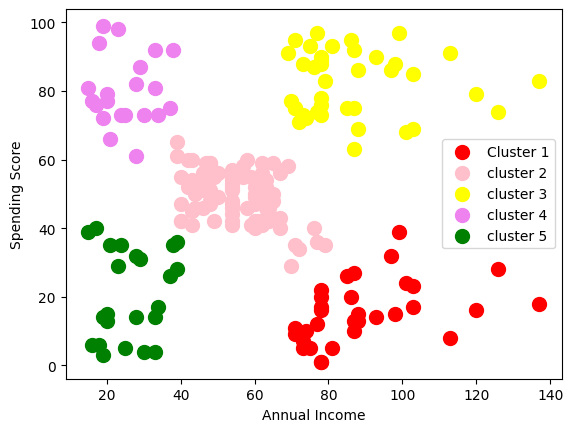

In [13]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='Cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='pink',label='cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='yellow',label='cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='violet',label='cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='green',label='cluster 5')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import silhouette_score
score=silhouette_score(x,y_hc)
print("silhouete score for Hierachicalclustering",score)

silhouete score for Hierachicalclustering 0.5529945955148897
